# Generate Video - Serie A

In [1]:
# import's
%run Functions\analysis3.py
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

In [2]:
# player's data
players = preprocessing()

In [3]:
clubs_SA = [[club] for club in find_clubs(['Serie A'], [i for i in range(2020, 2021)])]
clubs_SB = [[club] for club in find_clubs(['Serie B'], [i for i in range(2020, 2021)])]
clubs_SC = [[club] for club in find_clubs(['Serie C'], [i for i in range(2020, 2021)])]

In [4]:
clubs_SA2021 = [['Flamengo/RJ'], ['Atletico/MG'], ['Bahia/BA'], ['Palmeiras/SP'],
                ['Santos/SP'], ['RedBullBragantino/SP'], ['Corinthians/SP'], ['Atletico/GO'],
                ['Gremio/RS'], ['Fluminense/RJ'], ['Sport/PE'], ['Ceara/CE'],
                ['Internacional/RS'], ['Fortaleza/CE'], ['AthleticoParanaense/PR'], ['SaoPaulo/SP'],
                ['America/MG'], ['Chapecoense/SC'], ['Juventude/RS'], ['Cuiaba/MT']]
clubs_SB2021 = []
for club in clubs_SA:
    if club not in clubs_SA2021:
        clubs_SB2021.append(club)
        
for club in clubs_SB:
    if club not in clubs_SA2021:
        clubs_SB2021.append(club)
        
clubs_SB2021.remove(['Figueirense/SC'])
clubs_SB2021.remove(['Parana/PR'])
clubs_SB2021.remove(['Botafogo/SP'])
clubs_SB2021.remove(['Oeste/SP'])

clubs_SB2021.append(['VilaNova/GO'])
clubs_SB2021.append(['Brusque/SC'])
clubs_SB2021.append(['Remo/PA'])
clubs_SB2021.append(['Londrina/PR'])

In [5]:
# position of graph nodes
pos = {0 : (-2.0357901  , 21.05923425 ), 1 : ( 17.46278288, -27.35176353),
       2 : ( 28.52708712, -17.30524213), 3 : (-20.63179499,  26.23496596),
       4 : (11.35551693 , 19.46154395 ), 5 : ( 0.06126277 , -3.05330237 ),
       6 : (-9.1782319  ,  6.78066266 ), 7 : (  8.64392415, -34.        ),
       8 : (-24.76913891,  -1.14712264), 9 : (27.00415042 ,  2.26299456 ),
       10: ( -3.42342305, -16.92508998), 11: (-30.64318974,  15.87253747),
       12: (-12.90018259,  20.82244604), 13: (-13.9484924 ,  -5.58099373),
       14: (13.60511014 , 33.81296429 ), 15: (21.28784593 , 13.1543083  ),
       16: ( -1.28456475, -31.43022238), 17: (  6.83545736, -14.72813214),
       18: (-21.02246309, -26.73430514), 19: (-32.31764675,   4.53182605),
       20: (32.52455952 , -6.69463073 ), 21: (24.46104038 , 24.3015525  ),
       22: (-13.44839678, -17.18781001), 23: (33.64634033 ,  9.92695046 ),
       24: (19.12553549 , -7.37352597 ), 25: ( 3.42851098 , 30.07547007 ),
       26: (-7.99400078 , 32.63490036 ), 27: (-30.39793564,  -9.0656804 ),
       28: (2.95748502  , 9.94278342  ), 29: (-10.40273731, -30.79059326),
       30: (-20.64931002,  11.93009739), 31: ( 17.30774299, -18.41187134),
       32: (-26.66326805, -18.01378774), 33: (13.47621444 ,  2.98883575 )}

# club images
img_files = {'America/MG': 'Escudos\\americamg_bra.png',
             'AthleticoParanaense/PR': 'Escudos\\atleticopr_bra.png',
             'Atletico/GO': 'Escudos\\atleticogo_bra.png',
             'Atletico/MG': 'Escudos\\atleticomg_bra.png',
             'Avai/SC': 'Escudos\\avai_bra.png',
             'Bahia/BA': 'Escudos\\bahia.png',
             'Botafogo/RJ': 'Escudos\\botafogorj_bra.png',
             'CSA/AL': 'Escudos\\csa_bra.png',
             'Ceara/CE': 'Escudos\\ceara_bra.png',
             'Chapecoense/SC': 'Escudos\\chapecoense_bra.png',
             'Corinthians/SP': 'Escudos\\corinthians_bra.png',
             'Coritiba/PR': 'Escudos\\coritiba_bra.png',
             'Criciuma/SC': 'Escudos\\criciuma_bra.png',
             'Cruzeiro/MG': 'Escudos\\cruzeiro_bra.png',
             'Figueirense/SC': 'Escudos\\figueirense.png',
             'Flamengo/RJ': 'Escudos\\flarj.png',
             'Fluminense/RJ': 'Escudos\\flurj.png',
             'Fortaleza/CE': 'Escudos\\fortaleza.png',
             'Goias/GO': 'Escudos\\goias.png',
             'Gremio/RS': 'Escudos\\gremio.png',
             'Internacional/RS': 'Escudos\\internacional_bra.png',
             'Joinville/SC': 'Escudos\\joinville.png',
             'Nautico/PE': 'Escudos\\nautico.png',
             'Palmeiras/SP': 'Escudos\\palmeiras.png',
             'Parana/PR': 'Escudos\\parana.png',
             'PontePreta/SP': 'Escudos\\pontepreta_bra.png',
             'Portuguesa/SP': 'Escudos\\portuguesasp_bra.png',
             'RedBullBragantino/SP': 'Escudos\\bragantino_bra.png',
             'SantaCruz/PE': 'Escudos\\santa.png',
             'Santos/SP': 'Escudos\\santos.png',
             'SaoPaulo/SP': 'Escudos\\saopaulo_bra.png',
             'Sport/PE': 'Escudos\\sport.png',
             'Tubarao/SC': 'Escudos\\atleticotubarao_sc.png',
             'VascodaGama/RJ': 'Escudos\\vasco.png',
             'Vitoria/BA': 'Escudos\\vitoria.png',
             'ABC/RN': 'Escudos\\abcrn_bra.png',
             'ASA/AL': 'Escudos\\asaarapiracaal_bra.png',
             'America/RN': 'Escudos\\americarn.png',
             'Boa/MG': 'Escudos\\boa_mg.png',
             'Botafogo/PB': 'Escudos\\botafogopb_bra.png',
             'Botafogo/SP': 'Escudos\\botafogosp_bra.png',
             'Brasil/RS': 'Escudos\\brasilpelotas_bra.png',
             'CRB/AL': 'Escudos\\crb_bra.png',
             'Caldense/MG': 'Escudos//caldense.png',
             'Campinense/PB': 'Escudos\\campinensepb_bra.png',
             'Caxias/RS': 'Escudos\\caxias.png',
             'Central/PE': 'Escudos//centralpe.png',
             'Confianca/SE': 'Escudos\\confianca_se.png',
             'Cuiaba/MT': 'Escudos\\cuiaba_bra.png',
             'Guarani/SP': 'Escudos\\guaranisp_bra.png',
             'Guaratingueta/SP': 'Escudos\\guaratinguetasp_bra.png',
             'Icasa/CE': 'Escudos\\icasa_ce.png',
             'Juventude/RS': 'Escudos\\juventude.png',
             'Londrina/PR': 'Escudos\\londrina_pr.png',
             'Luverdense/MT': 'Escudos\\luverdensemt_bra.png',
             'Macae/RJ': 'Escudos\\macaerj_bra.png',
             'MogiMirim/SP': 'Escudos\\mogimirim_sp.png',
             'MotoClub/MA': 'Escudos\\motoclubma_bra.png',
             'Oeste/SP': 'Escudos\\oestesp_bra.png',
             'Operario/PR': 'Escudos\\operario_pr.png',
             'Paysandu/PA': 'Escudos\\paysandu.png',
             'Remo/PA': 'Escudos\\remo.png',
             'RioBranco/AC': 'Escudos\\riobranco_ac.png',
             'River/PI': 'Escudos\\riverpi_bra.png',
             'Salgueiro/PE': 'Escudos\\salgueirope_bra.png',
             'SampaioCorrea/MA': 'Escudos\\samapaiocorrea_ma.png',
             'Santos/AP': 'Escudos\\ap_santos.png',
             'SaoBento/SP': 'Escudos\\saobento_bra.png',
             'SaoCaetano/SP': 'Escudos\\saocaetano_bra.png',
             'Tombense/MG': 'Escudos\\tombense_mg.png',
             'Treze/PB': 'Escudos\\trezepb_bra.png',
             'Tupi/MG': 'Escudos\\tupijf_bra.png',
             'VilaNova/GO': 'Escudos\\vilago.png',
             'VillaNova/MG': 'Escudos\\villanovamg.png',
             'Ypiranga/RS': 'Escudos\\ypiranga_rs.png',
             'Aguia/PA': 'Escudos\\aguiamaraba.png',
             'Atletico/AC': 'Escudos\\atleticoac.png',
             'Baraunas/RN': 'Escudos\\baraunas.png',
             'Brasiliense/DF': 'Escudos\\brasiliense.png',
             'Brusque/SC': 'Escudos\\brusque.png',
             'DuquedeCaxias/RJ': 'Escudos\\duque_caxias.png',
             'Ferroviario/CE': 'Escudos\\ferroviario.png',
             'Globo/RN': 'Escudos\\globo.png',
             'GremioBarueri/SP': 'Escudos\\gremiobarueri.png',
             'Imperatriz/MA': 'Escudos\\imperatriz.png',
             'Ituano/SP': 'Escudos\\ituanofc.png',
             'Jacuipense/BA': 'Escudos\\jacuipense.png',
             'Juazeirense/BA': 'Escudos\\juazeirense.png',
             'Madureira/RJ': 'Escudos\\madureira.png',
             'Manaus/AM': 'Escudos\\manausfc.png',
             'SaoJose/RS': 'Escudos\\saojose_rs.png',
             'VoltaRedonda/RJ': 'Escudos\\volta.png',
             'Afogados/PE': 'Escudos//afogados.png',
             'AguiaNegra/MS': 'Escudos//aguianegra.png',
             'Altos/PI': 'Escudos//altos.png',
             'Aparecidense/GO': 'Escudos//aparecidense.png',
             'Aquidauanense/MS': 'Escudos//aquidauanense.png',
             'AtleticodeCajazeiras/PB': 'Escudos//atleticocajazeiras.png',
             'BahiadeFeira/BA': 'Escudos//bahiafeira.png',
             'Bangu/RJ': 'Escudos//bangu.png',
             'Bare/RR': 'Escudos//bare.png',
             'Bragantino/PA': 'Escudos//bragantinopa.png',
             'Cabofriense/RJ': 'Escudos//cabofriense.png',
             'Coruripe/AL': 'Escudos//coruripeal.png',
             'FastClube/AM': 'Escudos//fastclub.png',
             'FcCascavel/PR': 'Escudos//cascavel.png',
             'Ferroviaria/SP': 'Escudos//ferroviariasp.png',
             'Floresta/CE': 'Escudos//floresta.png',
             'FreiPaulistano/SE': 'Escudos//freipaulistano.png',
             'Galvez/AC': 'Escudos//galvez.png',
             'Gama/DF': 'Escudos//gama.png',
             'Goianesia/GO': 'Escudos//goianesia.png',
             'Goiania/GO': 'Escudos//goiania.png',
             'GuaranideJuazeiro/CE': 'Escudos//guaranijuazeiro.png',
             'GuaranydeSobral/CE': 'Escudos//guaranysobral.png',
             'IndependenteTucurui/PA': 'Escudos//independentetucurui.png',
             'Ipatinga/MG': 'Escudos//ipatinga.png',
             'Itabaiana/SE': 'Escudos//itabaiana.png',
             'Jacioba/AL': 'Escudos//jacyoba.png',
             'Ji-parana/RO': 'Escudos//jiparana.png',
             'MarcilioDias/SC': 'Escudos//marciliodias.png',
             'Mirassol/SP': 'Escudos//mirassol.png',
             'Nacional/AM': 'Escudos//nacionalam.png',
             'Nacional/PR': 'Escudos//nacionalpr.png',
             'Novorizontino/SP': 'Escudos//novorizontino.png',
             'Operario/MT': 'Escudos//operariomt.png',
             'Palmas/TO': 'Escudos//palmasto.png',
             'Pelotas/RS': 'Escudos//pelotas.png',
             'Portuguesa/RJ': 'Escudos//portuguesarj.png',
             'Potiguar/RN': 'Escudos//potiguar.png',
             'RealNoroeste/ES': 'Escudos//realnoroeste.png',
             'SaoLuiz/RS': 'Escudos//saoluizrs.png',
             'SaoRaimundo/RR': 'Escudos//saoraimundorr.png',
             'Sinop/MT': 'Escudos//sinopmt.png',
             'SociedadeEsportivaJuventude/MA': 'Escudos//juventudema.png',
             'Tocantinopolis/TO': 'Escudos//tocantinopolis.png',
             'TocantinsEsporteClube/TO': 'Escudos//tocantinsec.png',
             'Toledo/PR': 'Escudos//toledo.png',
             'Tupynambas/MG': 'Escudos//tupynambas.png',
             'UniaodeRondonopolis/MT': 'Escudos//rondonopolis.png',
             'Vilhena/RO': 'Escudos//vilhena.png',
             'Vilhenense/RO': 'Escudos//vilhenense.png',
             'VitoriaF.C./ES': 'Escudos//vitoriaes.png',
             'VitoriadaConquista/BA': 'Escudos//vitoriaconquista.png',
             'Ypiranga/AP': 'Escudos//ypirangaap.png',
             '4deJulho/PI': 'Escudos\\4dejulho.png',
             '7deSetembro/MS': 'Escudos\\7desetembroms.png',
             'A.s.s.u./RN': 'Escudos\\assurn.png',
             'Aimore/RS': 'Escudos\\aimore.png',
             'Amadense/SE': 'Escudos\\amadense.png',
             'America/PE': 'Escudos\\americape.png',
             'Americano/RJ': 'Escudos\\americanorj.png',
             'Anapolina/GO': 'Escudos\\anapolina.png',
             'Anapolis/GO': 'Escudos\\anapolis.png',
             'Aracruz/ES': 'Escudos\\aracruz.png',
             'Araguaia/MT': 'Escudos\\araguaia.png',
             'ArapongasEsporteClube/PR': 'Escudos\\arapongas.png',
             'Araxa/MG': 'Escudos\\araxa.png',
             'AssociacaoDesportivaItaborai/RJ': 'Escudos\\itaboraifc.png',
             'Atletico/BA': 'Escudos\\atleticoba.png',
             'Atletico/ES': 'Escudos\\atleticoes.png',
             'Atletico/PE': 'Escudos\\atleticope.png',
             'AtleticoCearense/CE': 'Escudos\\atleticoce.png',
             'AtleticoPatrocinense/MG': 'Escudos\\patrocinense.png',
             'AtleticoRoraima/RR': 'Escudos\\atleticorr.png',
             'Audax/SP': 'Escudos\\audaxsp.png',
             'Avenida/RS': 'Escudos\\avenida.png',
             'Barbalha/CE': 'Escudos\\barbalha.png',
             'Barcelona/RO': 'Escudos\\barcelona.png',
             'BeloJardim/PE': 'Escudos\\belojardim.png',
             'Betim/MG': 'Escudos\\betim.png',
             'Boavista/RJ': 'Escudos\\boavistarj.png',
             'Brasilia/DF': 'Escudos\\brasilia.png',
             'Cameta/PA': 'Escudos\\cameta.png',
             'Capivariano/SP': 'Escudos\\capivariano.png',
             'Caucaia/CE': 'Escudos\\caucaia.png',
             'Ceilandia/DF': 'Escudos\\ceilandia.png',
             'Cene/MS': 'Escudos\\cene.png',
             'Cianorte/PR': 'Escudos\\cianorte.png',
             'ColoColo/BA': 'Escudos\\colocoloba.png',
             'Comercial/MS': 'Escudos\\comercialms.png',
             'Cordino/MA': 'Escudos\\cordinoma.png',
             'Corumbaense/MS': 'Escudos\\corumbaense.png',
             'Crac/GO': 'Escudos\\crac.png',
             'Desportiva/ES': 'Escudos\\desportiva.png',
             'DomBosco/MT': 'Escudos\\dombosco.png',
             'EspiritoSanto/ES': 'Escudos\\espiritosanto.png',
             'Estanciano/SE': 'Escudos\\estanciano.png',
             'EstreladoNorte/ES': 'Escudos\\estreladonorte.png',
             'Flamengo/PE': 'Escudos\\flamengope.png',
             'Flamengo/PI': 'Escudos\\flamengopi.png',
             'FluminensedeFeira/BA': 'Escudos\\fludefeira.png',
             'FozdoIguacu/PR': 'Escudos\\fozdoiguacu.png',
             'Friburguense/RJ': 'Escudos\\friburguense.png',
             'Galicia/BA': 'Escudos\\galicia.png',
             'Gaucho/RS': 'Escudos\\gaucho.png',
             'Genus/RO': 'Escudos\\genus.png',
             'Guarani/SC': 'Escudos\\guaranisc.png',
             'Gurupi/TO': 'Escudos\\gurupi.png',
             'HercilioLuzFutebolClube/SC': 'Escudos\\hercilioluz.png',
             'InterdeLages/SC': 'Escudos\\interdelages.png',
             'InterdeLimeira/SP': 'Escudos\\interdelimeira.png',
             'Interporto/TO': 'Escudos\\interporto.png',
             'Ipora/GO': 'Escudos\\ipora.png',
             'Itapora/MS': 'Escudos\\itapora.png',
             'Itumbiara/GO': 'Escudos\\itumbiara.png',
             'Ivinhema/MS': 'Escudos\\ivinhema.png',
             'J.Malucelli/PR': 'Escudos\\jmalucelli.png',
             'JacobinaEc/BA': 'Escudos\\jacobina.png',
             'Lagarto/SE': 'Escudos\\lagarto.png',
             'Lajeadense/RS': 'Escudos\\lajeadense.png',
             'Linense/SP': 'Escudos\\linense.png',
             'Luziania/DF': 'Escudos\\luziania.png',
             'Macapa/AP': 'Escudos\\macapa.png',
             'Maranhao/MA': 'Escudos\\maranhao.png',
             'Maringa/PR': 'Escudos\\maringa.png',
             'Metropolitano/SC': 'Escudos\\metropolitano.png',
             'Mixto/MT': 'Escudos\\mixto.png',
             'Murici/AL': 'Escudos\\murici.png',
             'Nautico/RR': 'Escudos\\nauticorr.png',
             'Naviraiense/MS': 'Escudos\\naviraiense.png',
             'Noroeste/SP': 'Escudos\\noroeste.png',
             'NovaIguacu/RJ': 'Escudos\\novaiguacu.png',
             'Novo/MS': 'Escudos\\novo.png',
             'NovoHamburgo/RS': 'Escudos\\novohamburgo.png',
             'Operario/MS': 'Escudos\\operario.png',
             'Oratorio/AP': 'Escudos\\oratorio.png',
             'Paragominas/PA': 'Escudos\\paragominas.png',
             'Parauapebas/PA': 'Escudos\\parauapebas.png',
             'Parnahyba/PI': 'Escudos\\parnahyba.png',
             'Penapolense/SP': 'Escudos\\penapolense.png',
             'Piaui/PI': 'Escudos\\piaui.png',
             'PlacidodeCastro/AC': 'Escudos\\placidodecastro.png',
             'Porto/PE': 'Escudos\\portope.png',
             'PrincesadoSolimoes/AM': 'Escudos\\princesadosolimoes.png',
             'Prudentopolis/PR': 'Escudos\\prudentopolis.png',
             'Pstc/PR': 'Escudos\\pstc.png',
             'RealDesportivo/RO': 'Escudos\\realdesportivo.png',
             'RedBullBrasil/SP': 'Escudos\\redbullbrasil.png',
             'Resende/RJ': 'Escudos\\resende.png',
             'RioBranco/ES': 'Escudos\\riobrancoes.png',
             'Rondoniense/RO': 'Escudos\\rondoniense.png',
             'S.francisco/PA': 'Escudos\\sfranciscopa.png',
             'SantaCruz/RN': 'Escudos\\santacruzrn.png',
             'SantaRita/AL': 'Escudos\\santaritaal.png',
             'SantoAndre/SP': 'Escudos\\santoandresp.png',
             'SaoBernardo/SP': 'Escudos\\saobernardosp.png',
             'SaoPaulo/RS': 'Escudos\\saopaulors.png',
             'SaoRaimundo/PA': 'Escudos\\saoraimundopa.png',
             'Sergipe/SE': 'Escudos\\sergipe.png',
             'Serra/ES': 'Escudos\\serra.png',
             'SerraTalhada/PE': 'Escudos\\serratalhada.png',
             'Serrano/BA': 'Escudos\\serranoba.png',
             'Serrano/PB': 'Escudos\\serranopb.png',
             'Sobradinho/DF': 'Escudos\\sobradinho.png',
             'Sousa/PB': 'Escudos\\sousa.png',
             'Sparta/TO': 'Escudos\\sparta.png',
             'Tiradentes/CE': 'Escudos\\tiradentes.png',
             'Trem/AP': 'Escudos\\trem.png',
             'Uberlandia/MG': 'Escudos\\uberlandia.png',
             'Urt/MG': 'Escudos\\urt.png',
             'Veranopolis/RS': 'Escudos\\veranopolis.png',
             'Vitoria/PE': 'Escudos\\vitoriape.png',
             'Votuporanguense/SP': 'Escudos\\votuporangense.png',
             'XvdePiracicaba/SP': 'Escudos\\xvdepiracicaba.png',
             'Ypiranga/PE': 'Escudos\\ypirangape.png'}

Graph saved as clubs SA2021 - 2013.png
Graph saved as clubs SA2021 - 2014.png
Graph saved as clubs SA2021 - 2015.png
Graph saved as clubs SA2021 - 2016.png
Graph saved as clubs SA2021 - 2017.png
Graph saved as clubs SA2021 - 2018.png
Graph saved as clubs SA2021 - 2019.png
Graph saved as clubs SA2021 - 2020.png
Graph saved as clubs SB2021 - 2013.png
Graph saved as clubs SB2021 - 2014.png
Graph saved as clubs SB2021 - 2015.png
Graph saved as clubs SB2021 - 2016.png
Graph saved as clubs SB2021 - 2017.png
Graph saved as clubs SB2021 - 2018.png
Graph saved as clubs SB2021 - 2019.png
Graph saved as clubs SB2021 - 2020.png


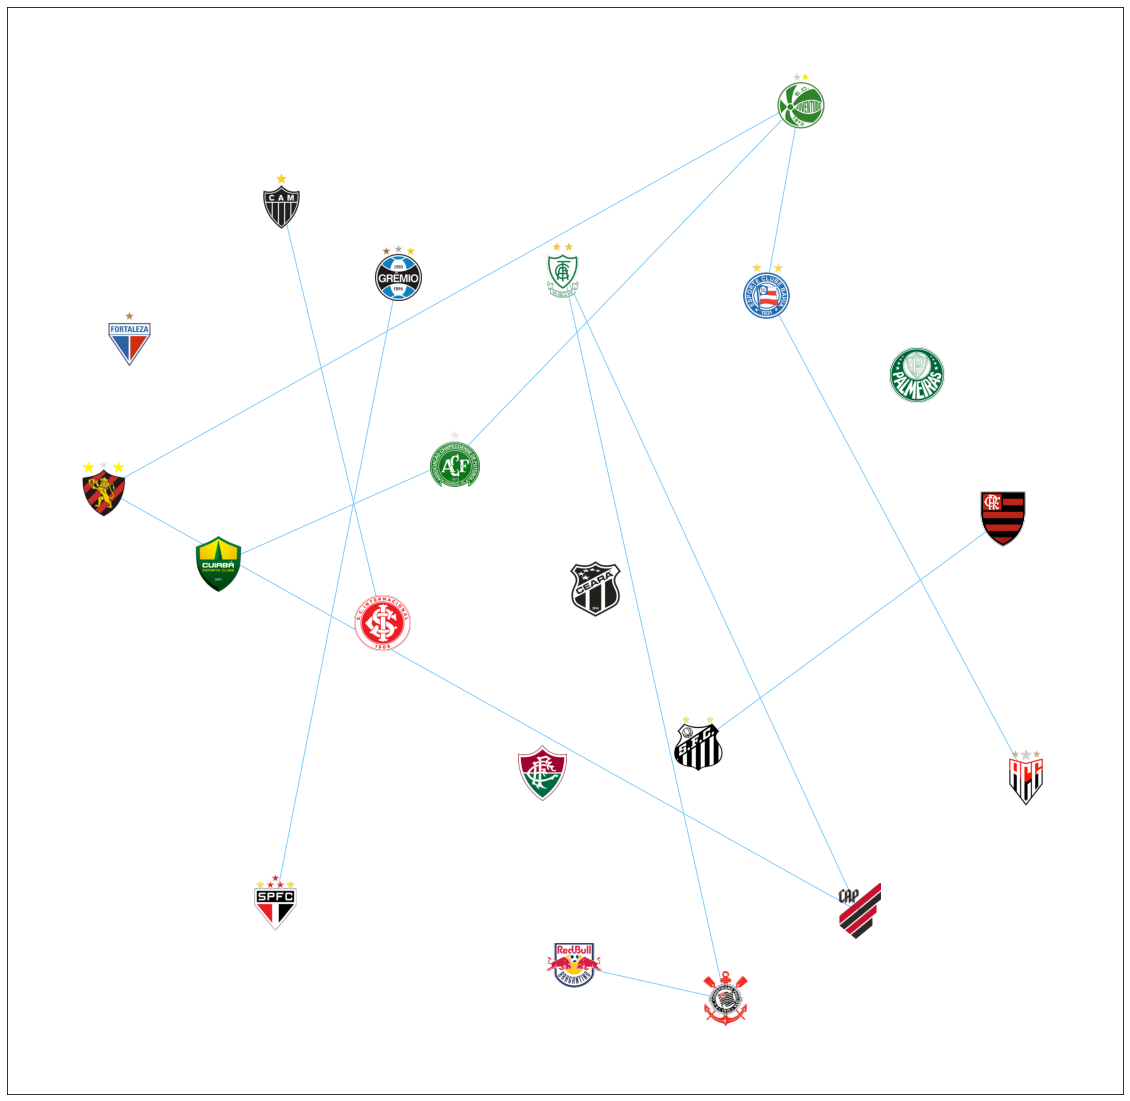

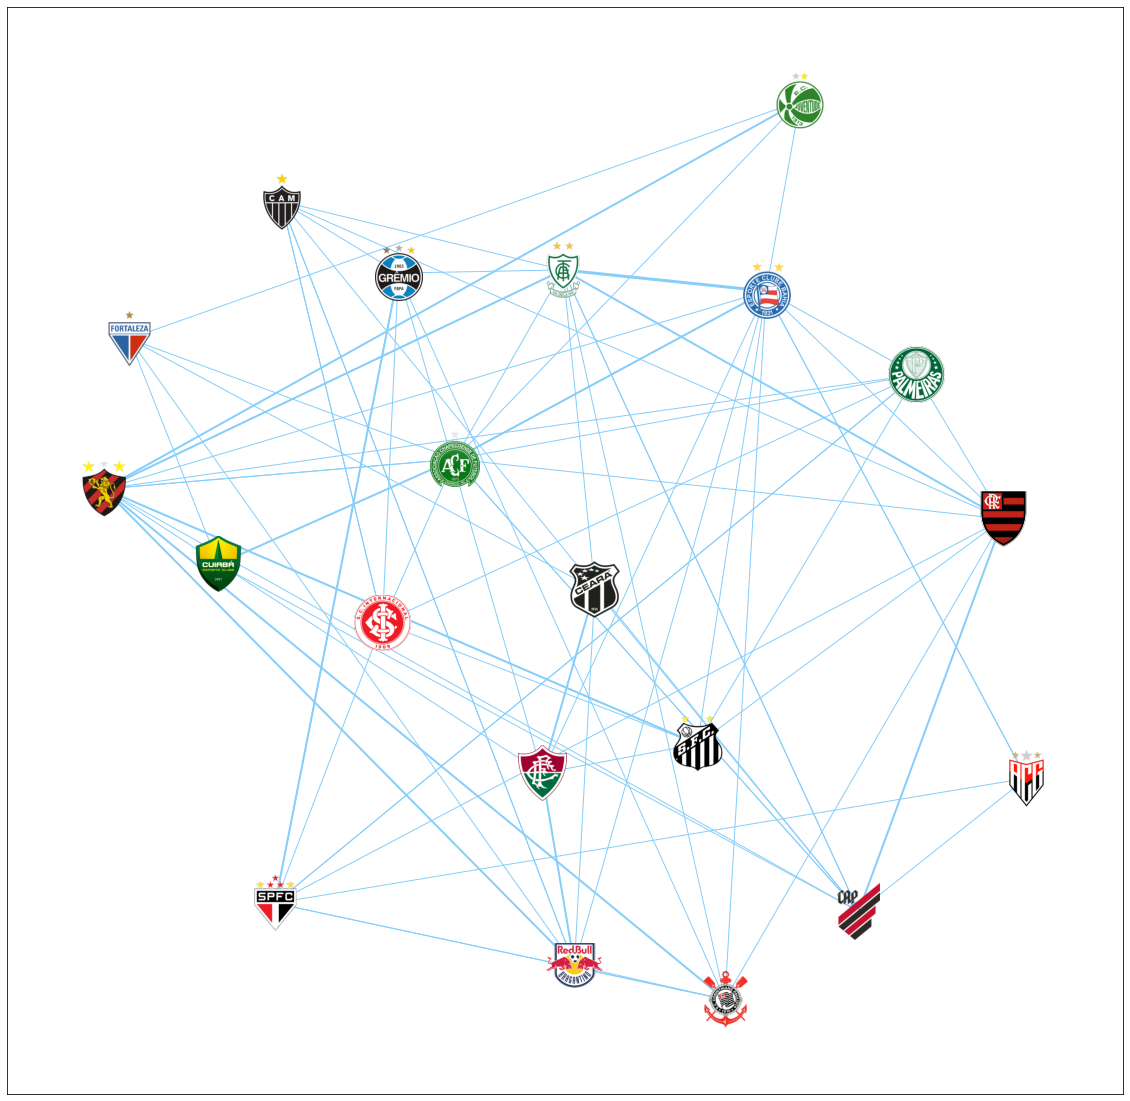

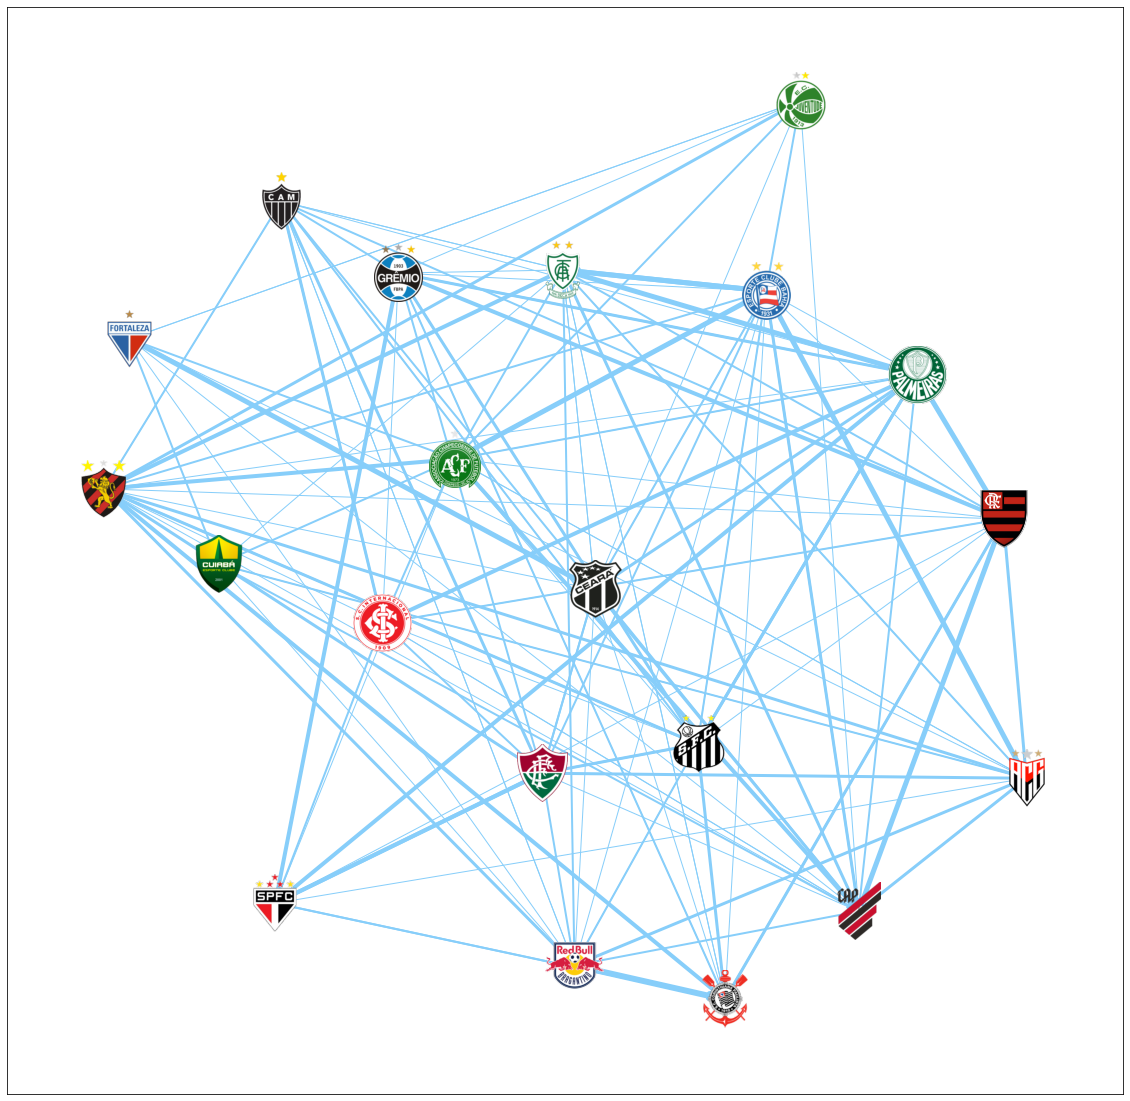

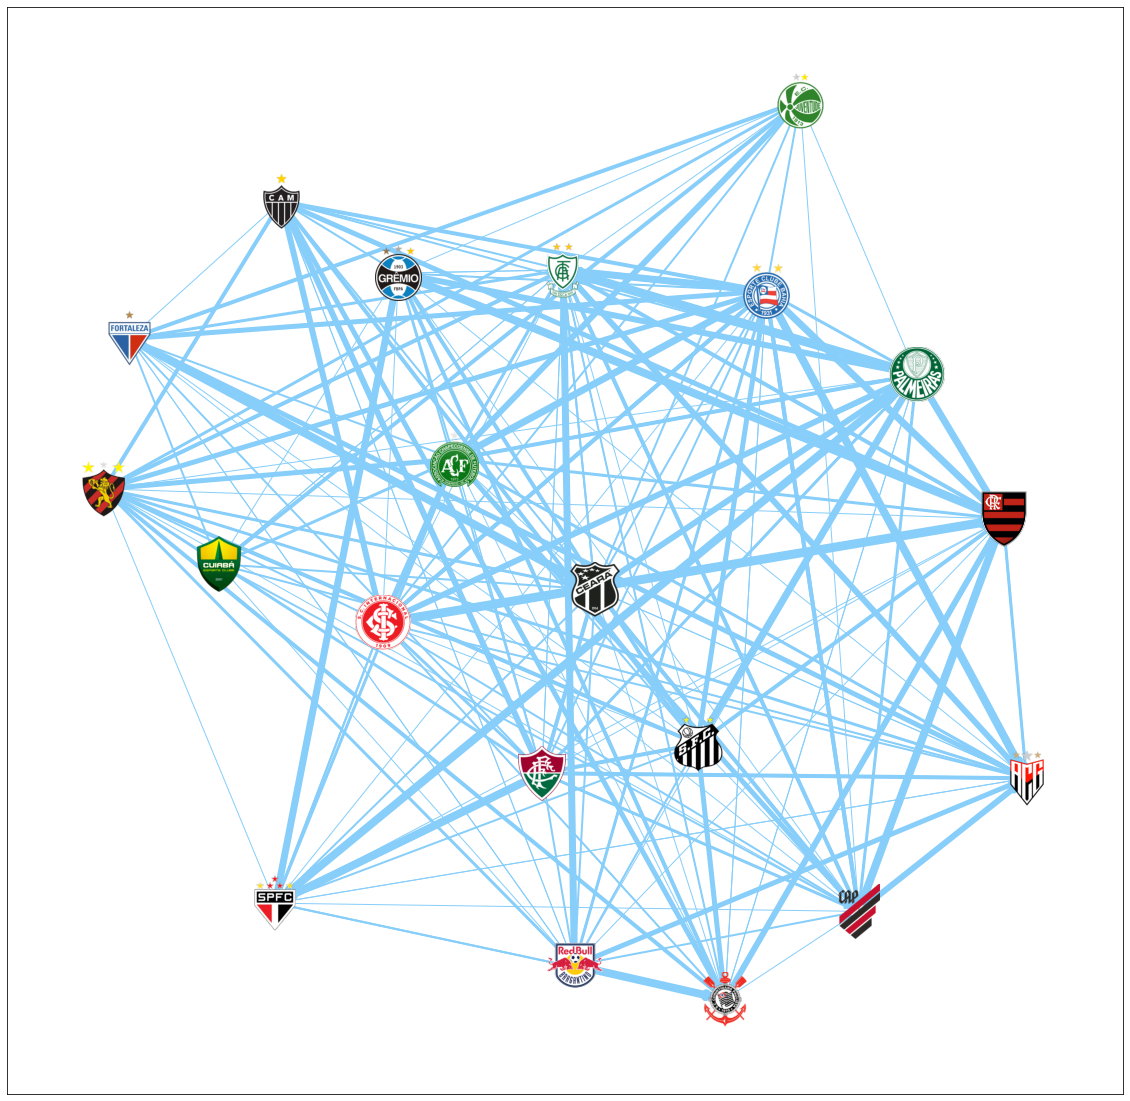

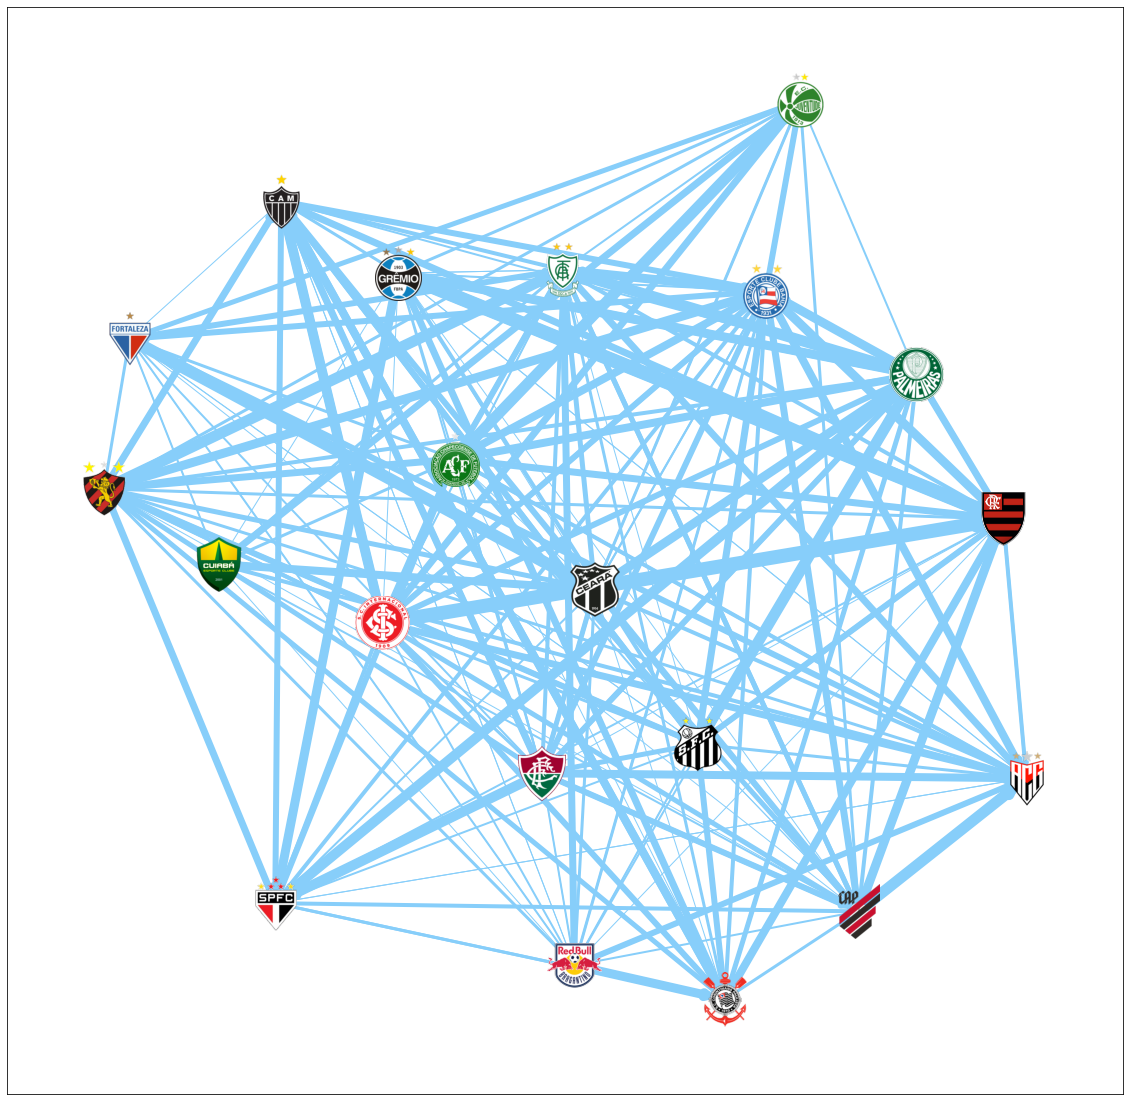

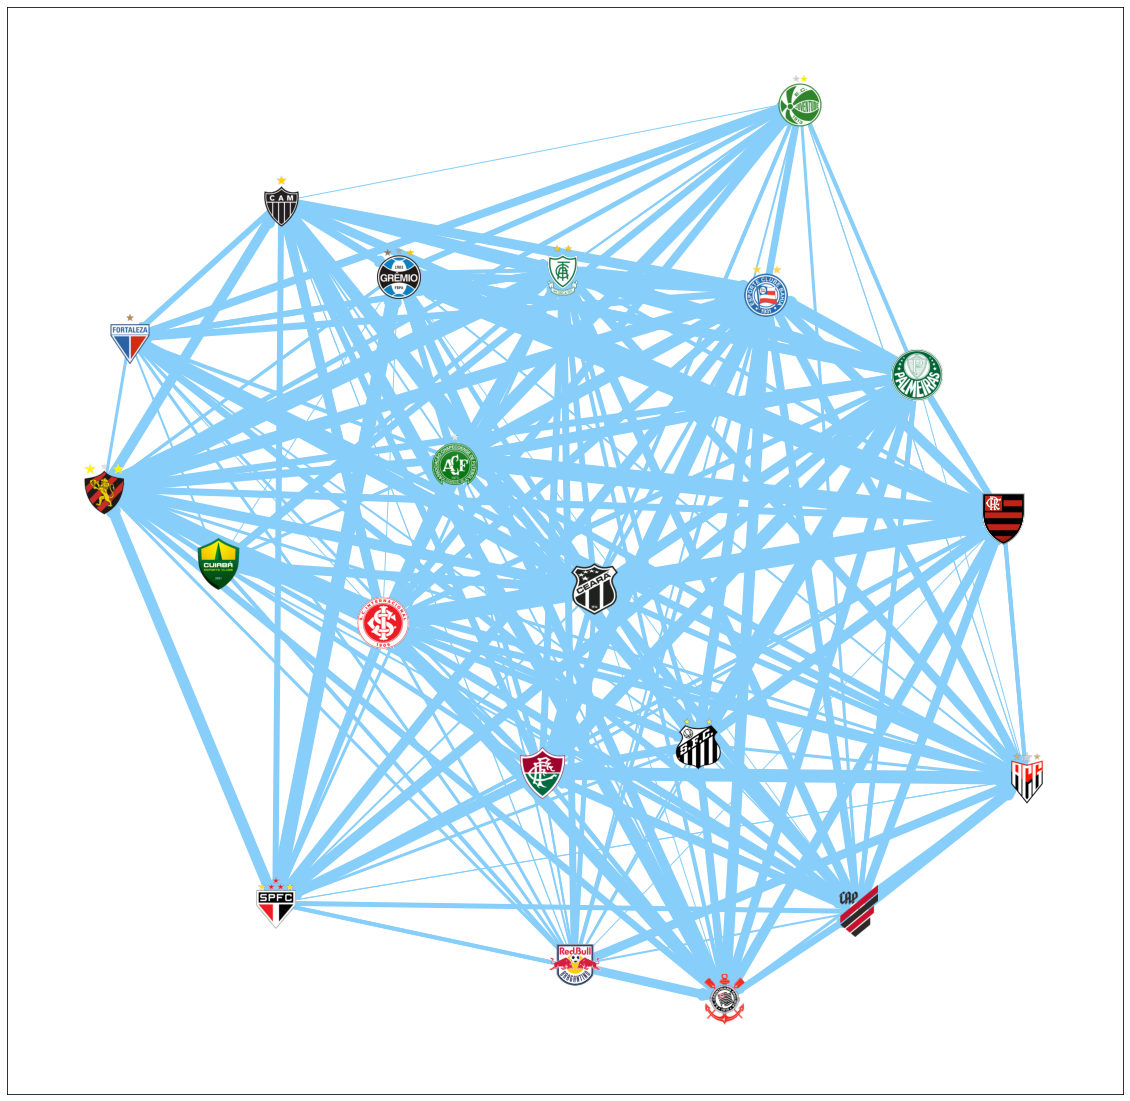

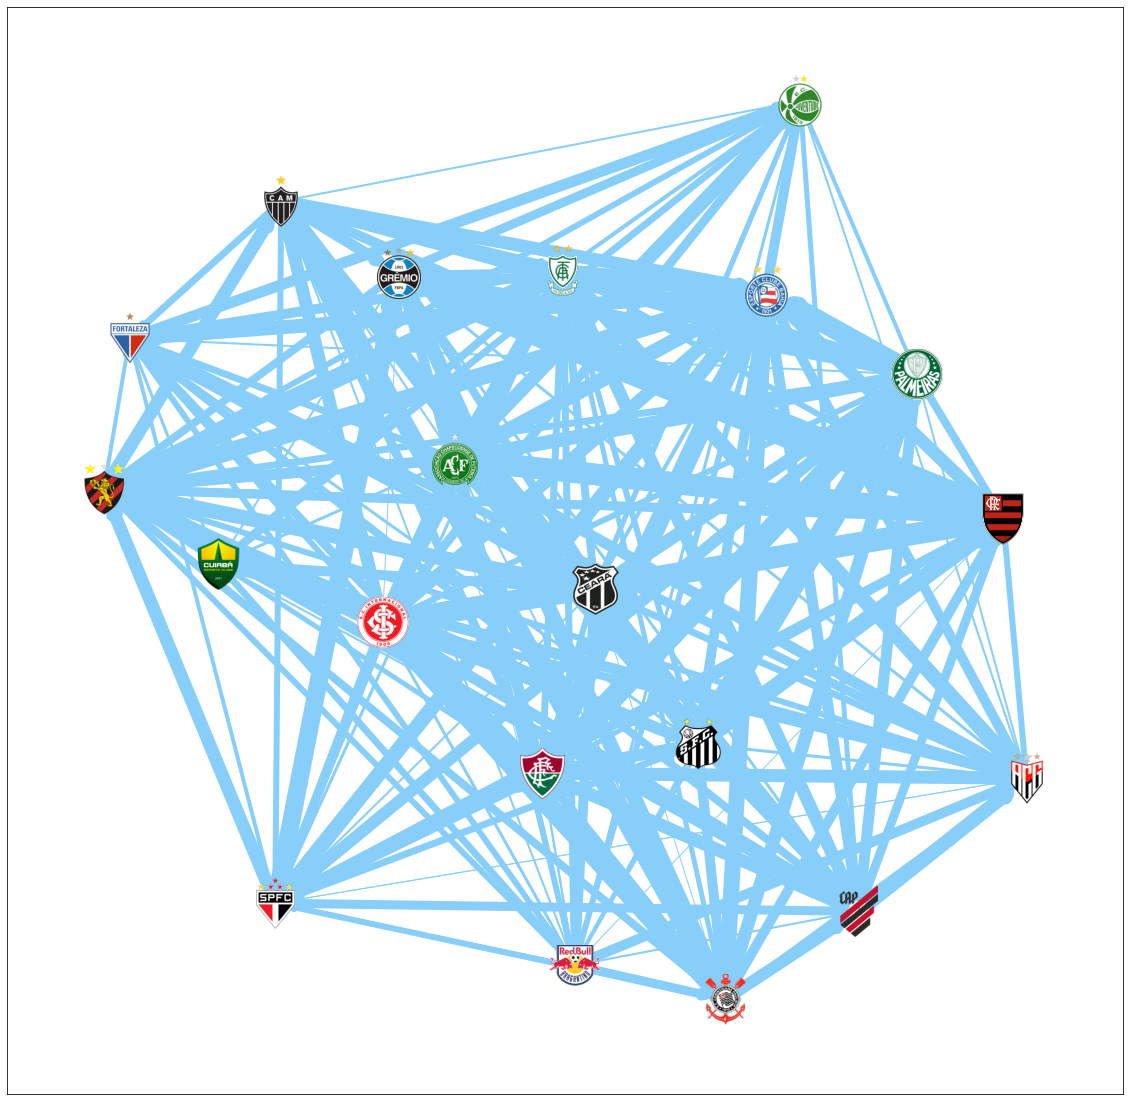

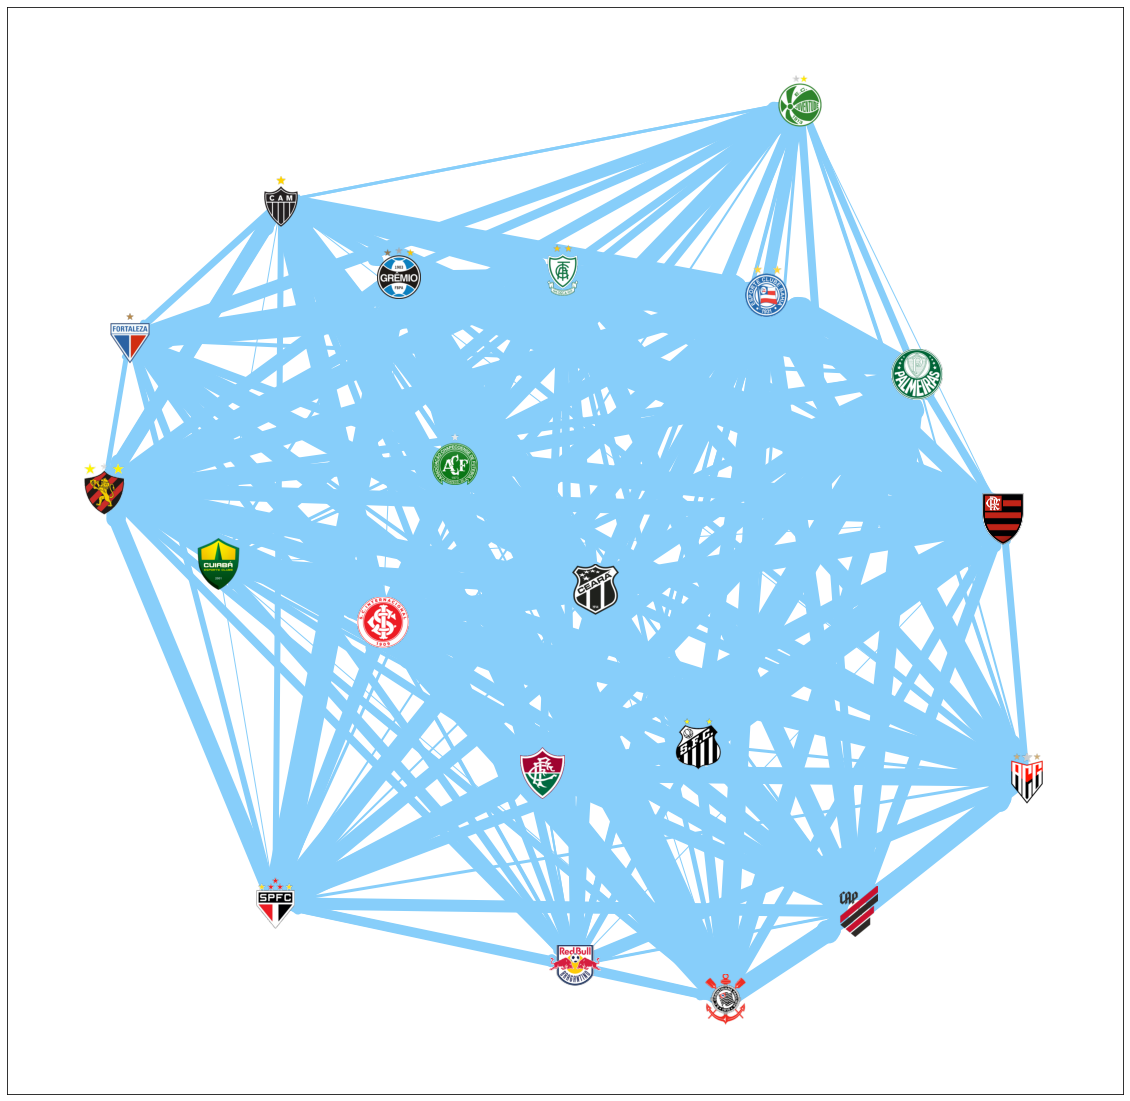

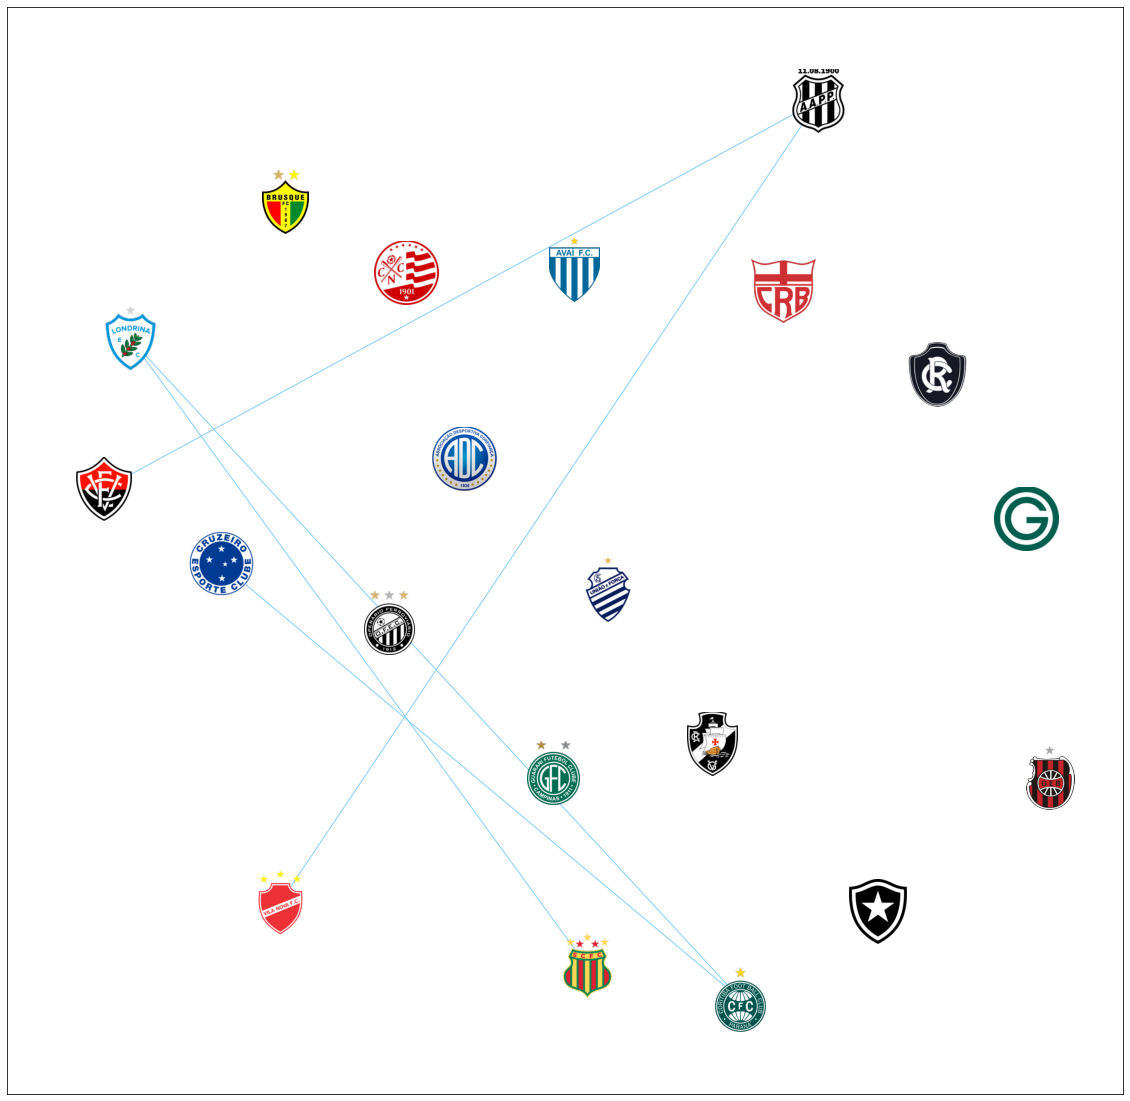

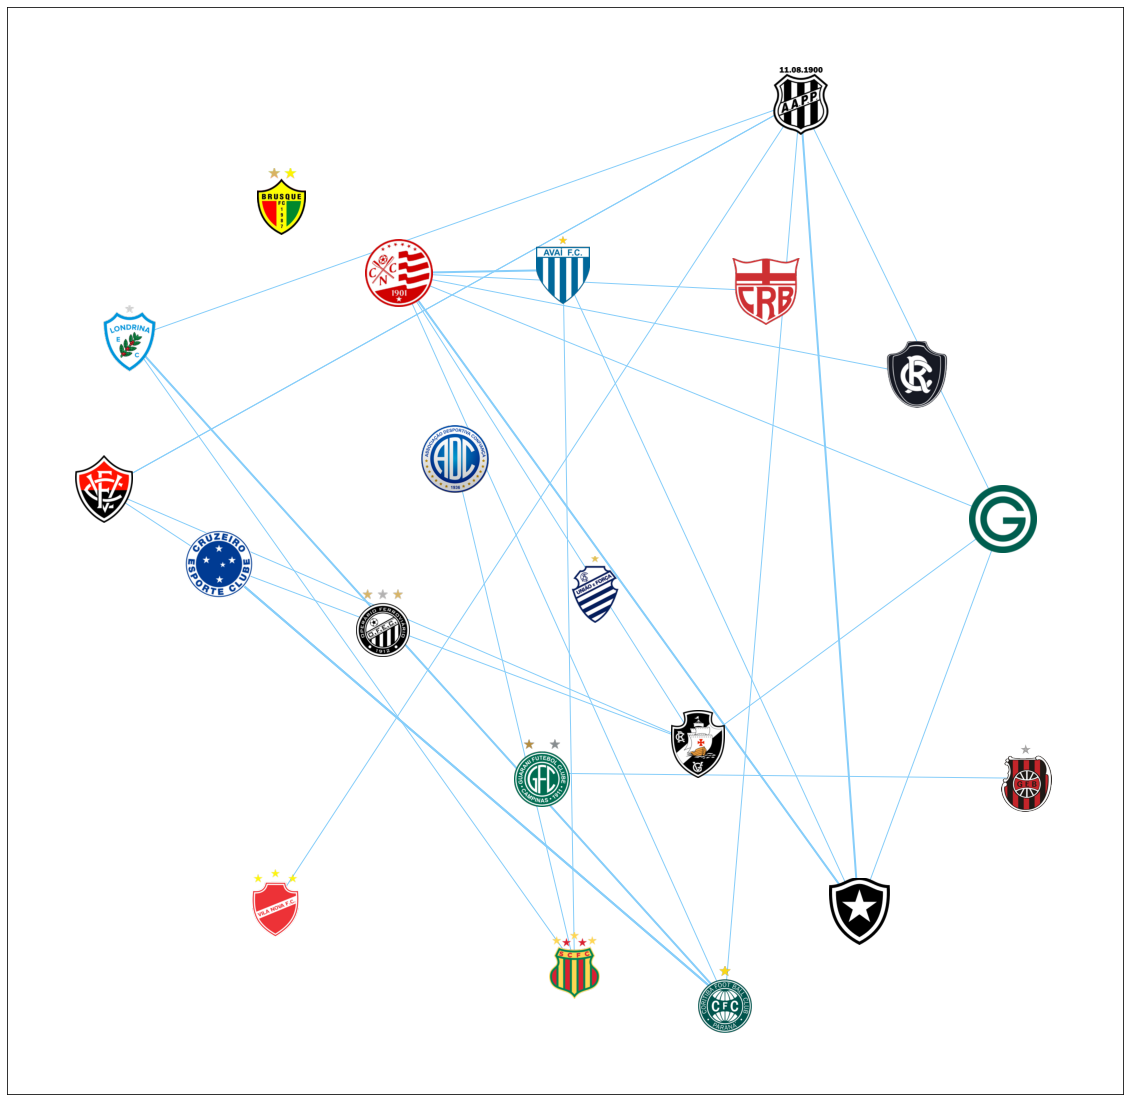

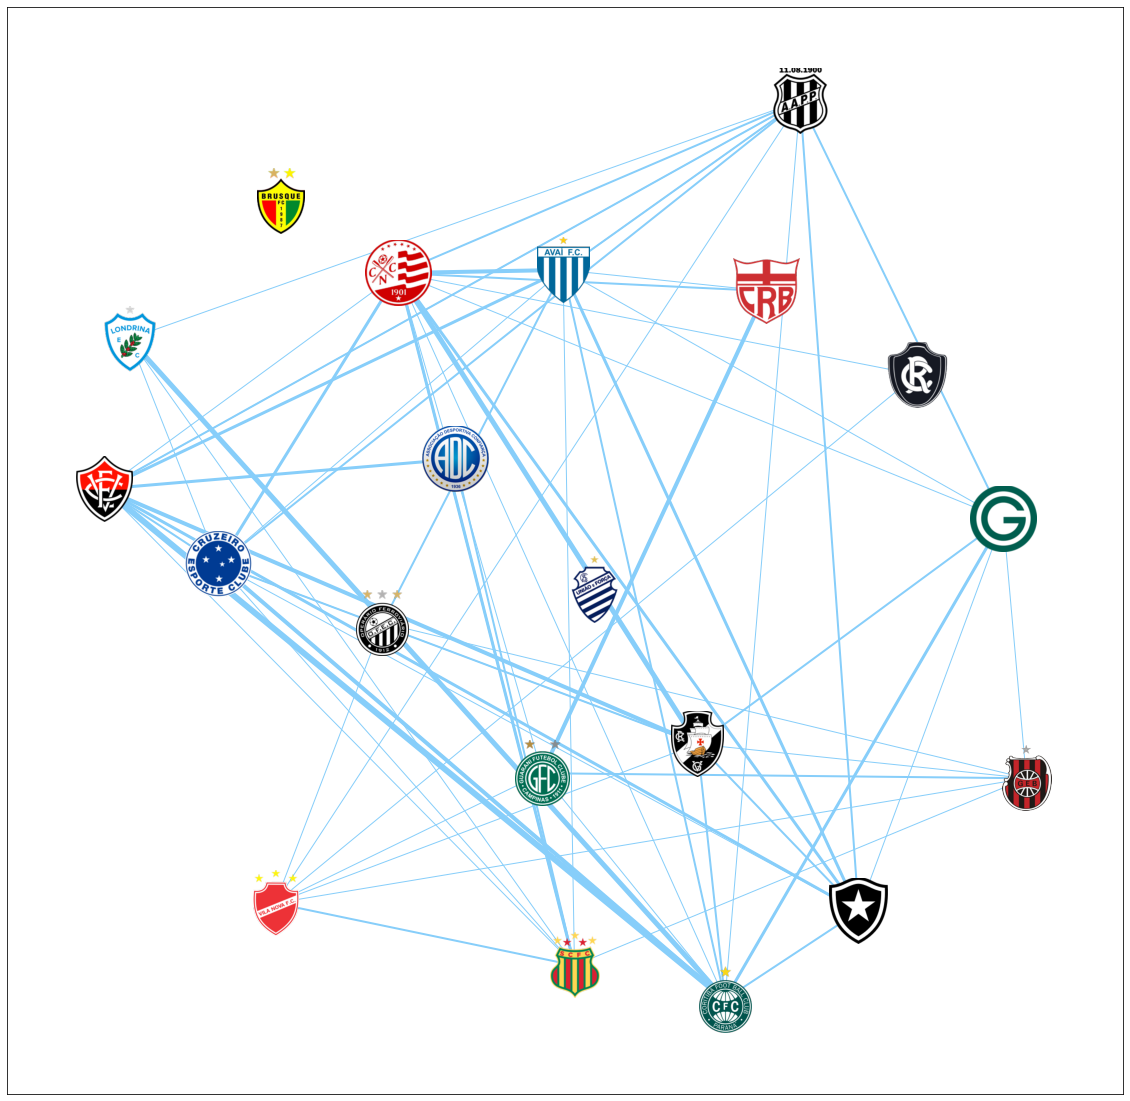

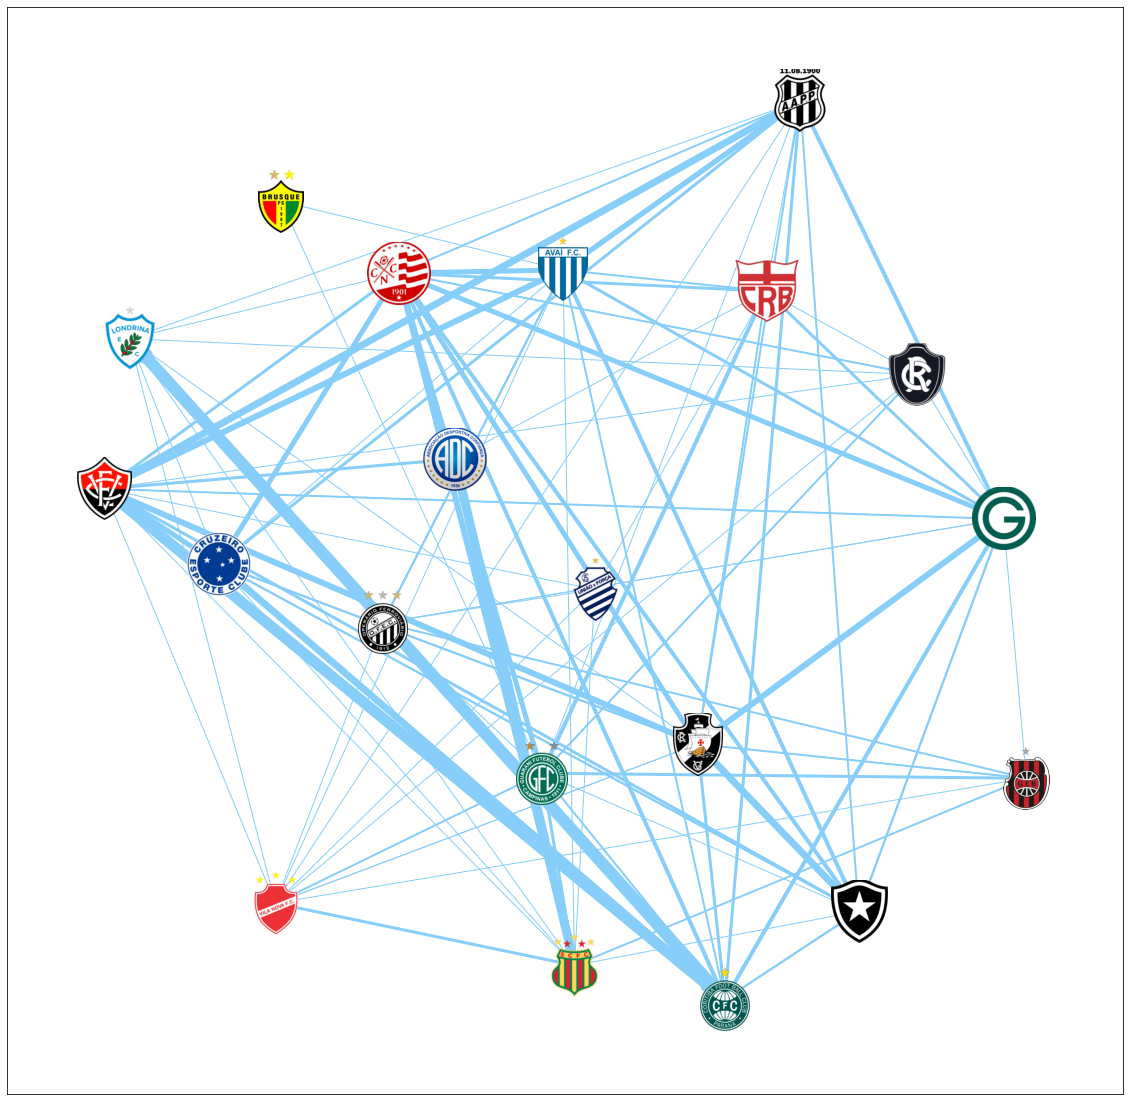

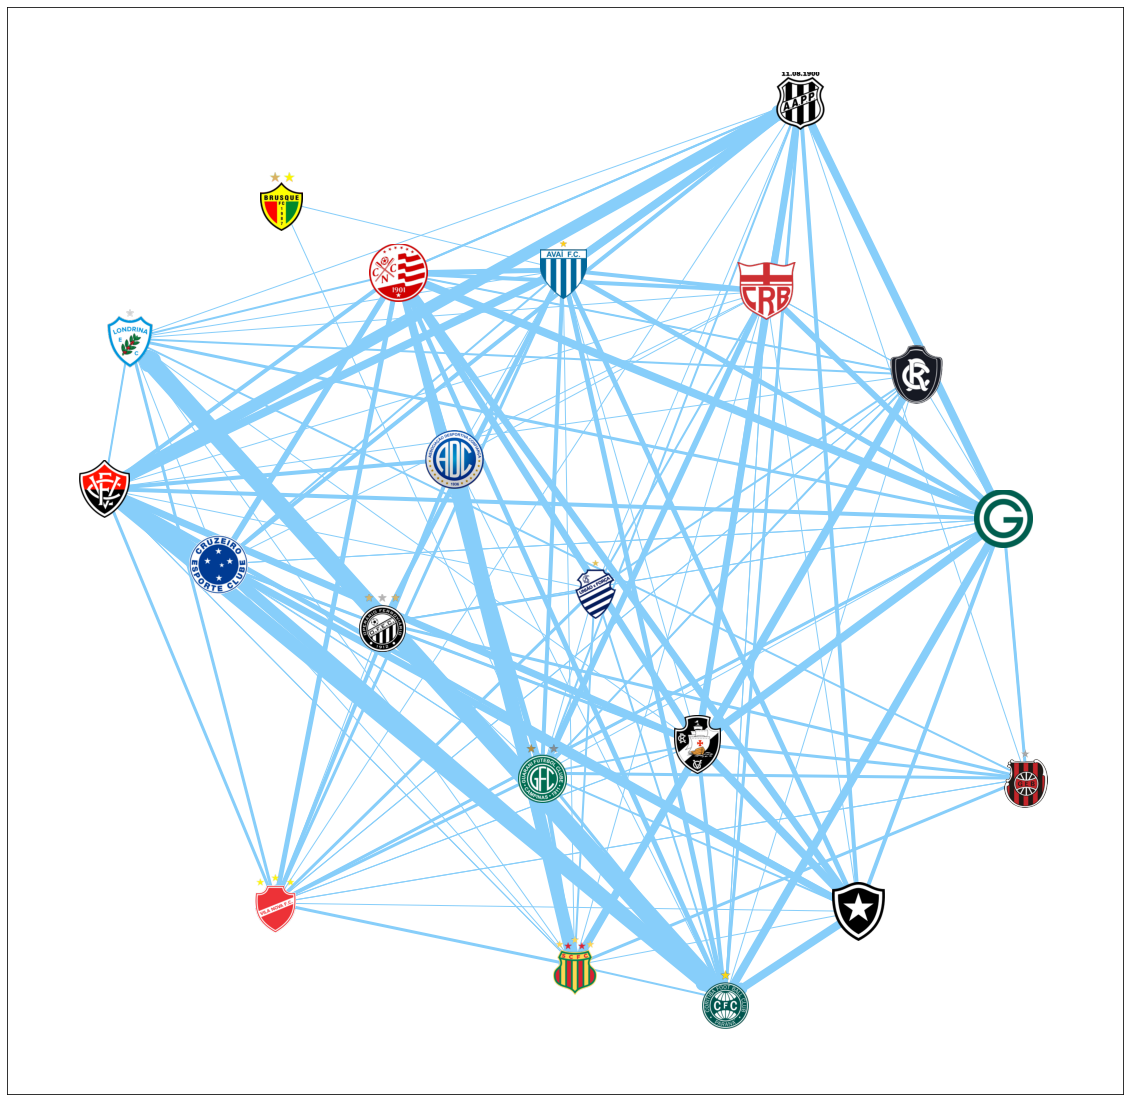

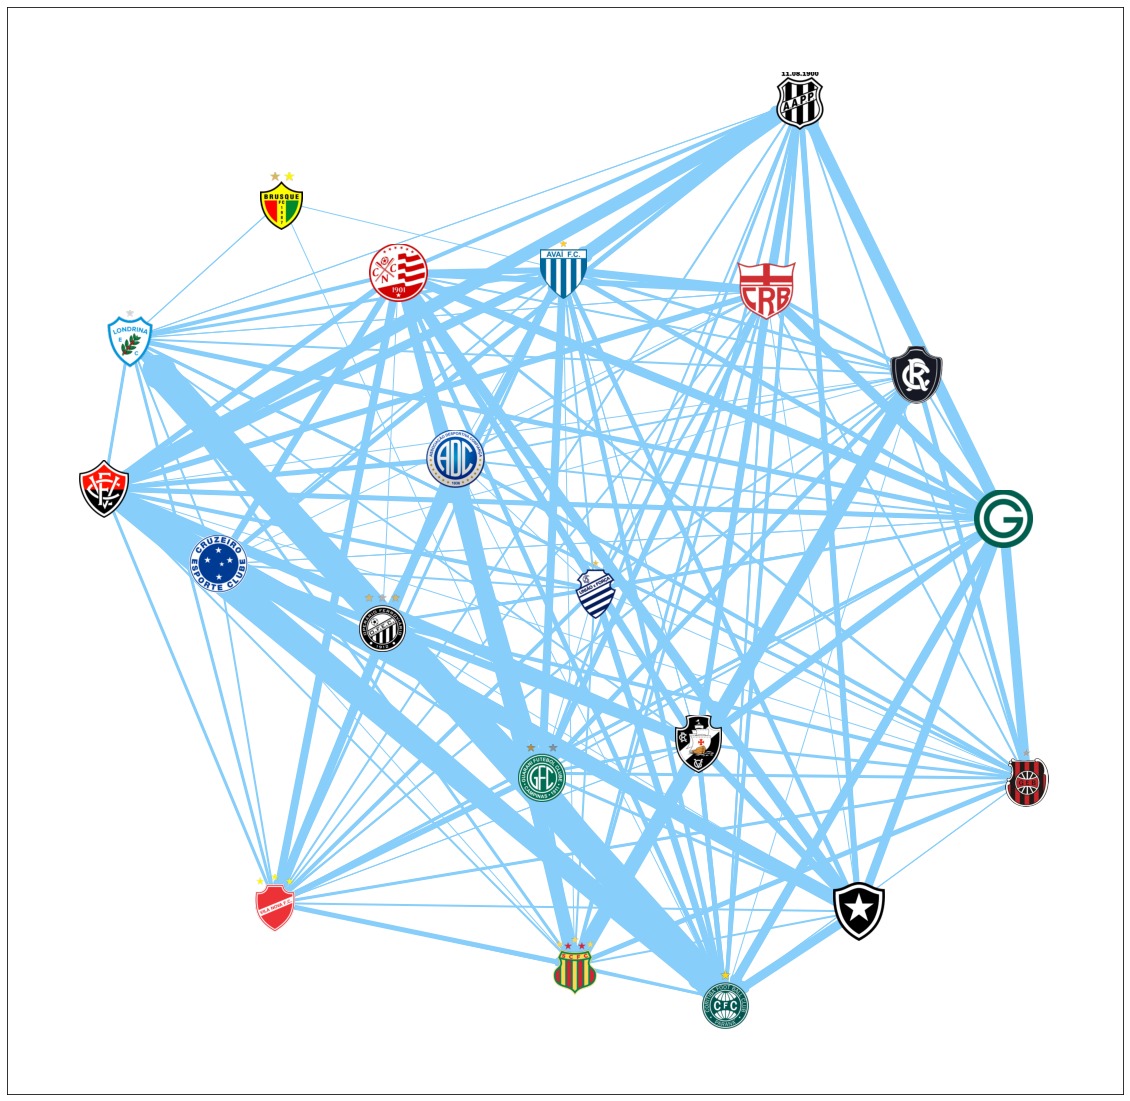

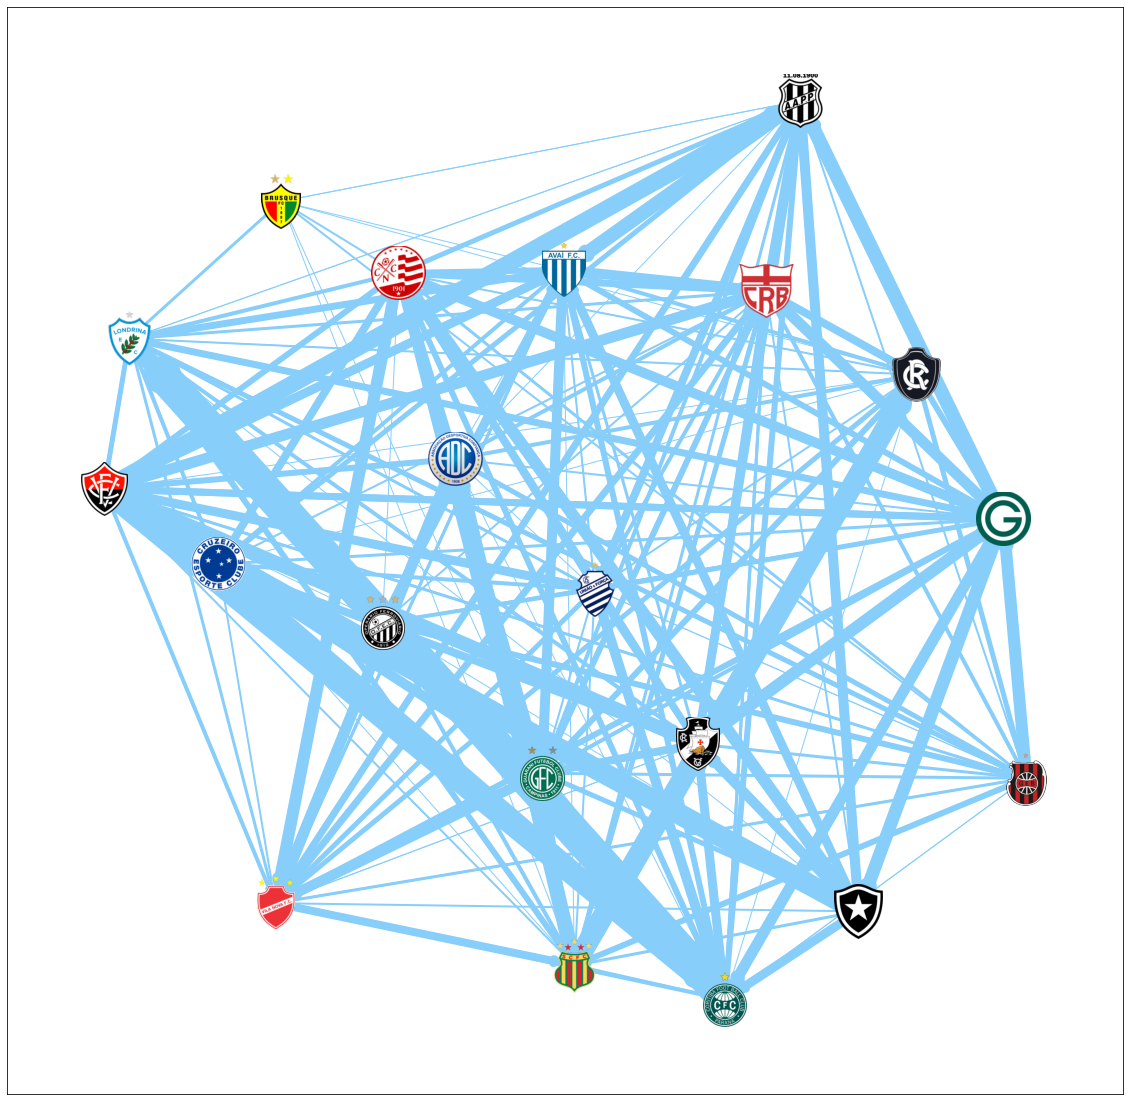

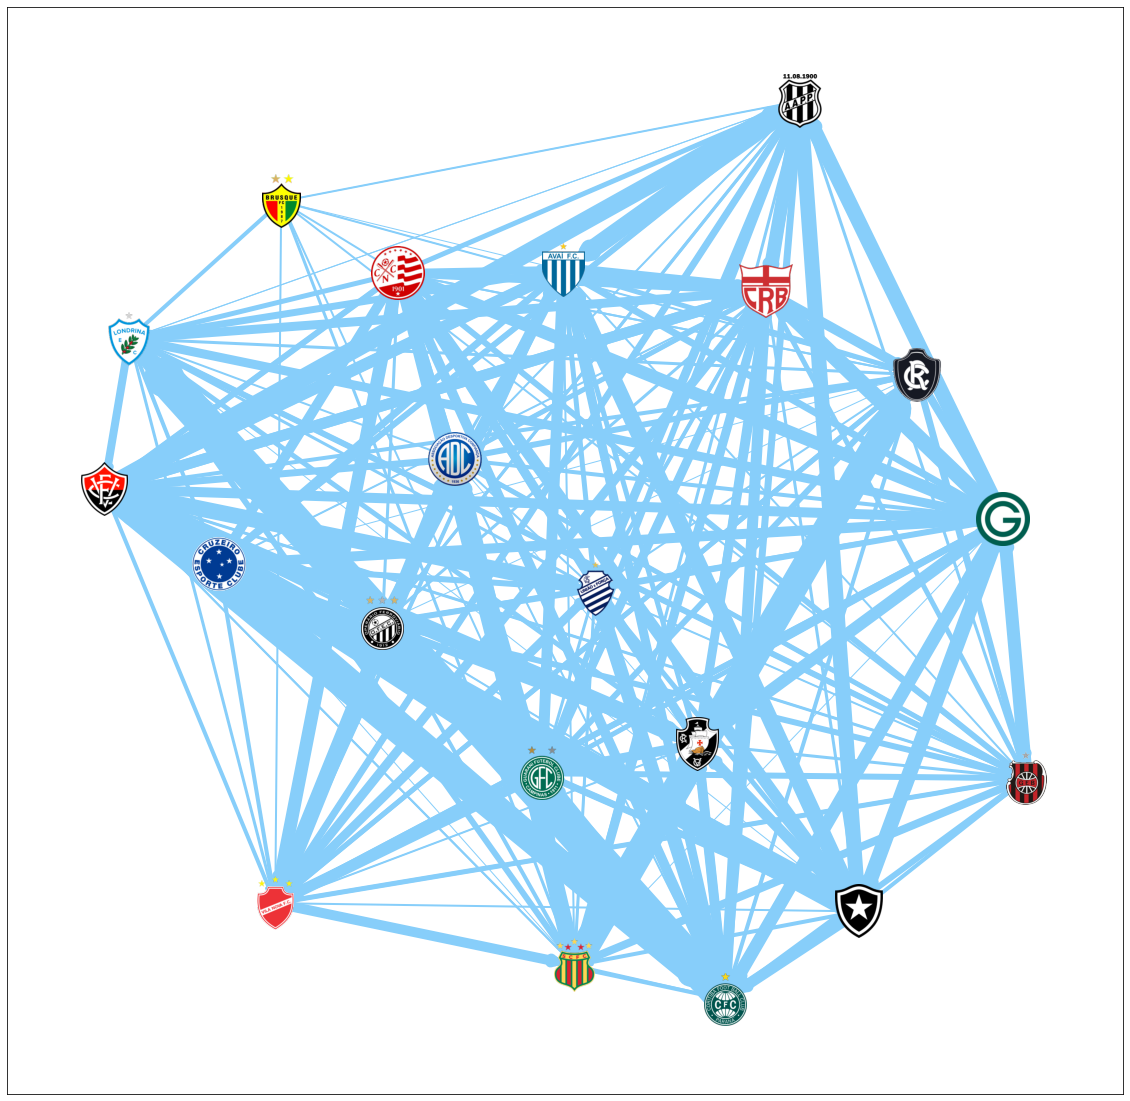

In [6]:
# list of clubs with players
list_clubs = [clubs_SA2021, clubs_SB2021]
for index in range(2):
    clubs = list_clubs[index].copy()
    for year in players:
        for club in clubs:
            club.append([])
            for i_player in range(2, len(year)):
                if replace(year[i_player][1]) == club[0]:
                    club[-1].append(year[i_player][0])

    # list of players
    players_SA = []
    for club in clubs:
        for i in range(1, len(club)):
            for j in range(len(club[i])):
                if club[i][j] not in players_SA:
                        players_SA.append(club[i][j])     

    # list of player careers
    SA_all_changes = []
    for player in players_SA:
        SA_all_changes.append([])
        for club in clubs:
            for i in range(1, len(club)):
                for cod in club[i]:
                    if str(player) == cod and ([club[0], i + 2012] not in SA_all_changes[-1]):
                        SA_all_changes[-1].append([club[0], i + 2012])

    clubs = sorted([club[0] for club in clubs])

    # create incidence matrix
    incidence_matrix = []        
    for year in range(2013, 2021):
        incidence_matrix.append([])
        for i in range(len(clubs)):
            incidence_matrix[year - 2013].append([])
            for j in range(len(clubs)):
                incidence_matrix[year - 2013][i].append(0)
                for player in SA_all_changes:
                    career = sorted(player, key = lambda x : x[1])
                    for k in range(len(career)):
                        if career[k][0] == clubs[i] and career[k][1] <= year:
                            for l in range(k, len(career)):
                                if career[l][0] == clubs[j] and career[k][1] <= career[l][1] <= year:
                                    incidence_matrix[year - 2013][i][j] += 1
    
    # some graph parameters
    year = 2020
    save = False
    test = np.array(incidence_matrix[year - 2013])
    G = nx.from_numpy_matrix(test, create_using = nx.DiGraph)

    width = []
    for i in range(len(incidence_matrix[year - 2013])):
        for j in range(len(incidence_matrix[year - 2013][i])):
            if incidence_matrix[year - 2013][i][j] != 0:
                width.append(incidence_matrix[year - 2013][i][j])

    node_size = []
    for i in range(len(G.nodes())):
        try:
            node_size.append(G[i][i]['weight'])
        except:
            node_size.append(0)

    # generating and saving graphs
    save = True
    for year in range(2013, 2021):
        if index == 0:
            file_name = 'clubs SA2021 - ' + str(year) + '.png'
        else:
            file_name = 'clubs SB2021 - ' + str(year) + '.png'
            
        test = np.array(incidence_matrix[year - 2013])
        G = nx.from_numpy_matrix(test, create_using = nx.DiGraph)

        width = []
        for i in range(len(incidence_matrix[year - 2013])):
            for j in range(len(incidence_matrix[year - 2013][i])):
                if incidence_matrix[year - 2013][i][j] != 0:
                    width.append(incidence_matrix[year - 2013][i][j])

        node_size = []
        for i in range(len(G.nodes())):
            try:
                node_size.append(G[i][i]['weight'])
            except:
                node_size.append(0)


        fig, ax = plt.subplots(figsize = (20, 20))

        nx.draw_networkx_edge_labels(G,
                                     pos,
                                     edge_labels = nx.get_edge_attributes(G, 'relation'),
                                     label_pos = 1.5,
                                     font_size = 9,
                                     font_color = 'red',
                                     font_family = 'sans-serif',
                                     font_weight = 'normal',
                                     alpha = 1.0,
                                     bbox = None,
                                     ax = ax,
                                     rotate = True)

        nx.draw_networkx(G,
                         pos = pos,
                         ax = ax,
                         node_color = ['white' for g in G.nodes()],
                         edge_color = ['lightskyblue' for g in G.edges()],
                         node_size = node_size,
                         width = width)

        labels = {}
        for g in G.nodes():
            labels[g] = g

        nx.draw_networkx_labels(G,
                                pos = pos,
                                labels = labels,
                                ax = ax,
                                font_color = 'white')

        trans = ax.transData.transform
        trans2 = fig.transFigure.inverted().transform
        weights = nx.get_node_attributes(G, 'weight')
        w_max = max(node_size)
        w_min = min(node_size)

        dif = w_max - w_min
        new = 0
        relabel = {}

        for g in G.nodes():
            if type(g) == int:
                club = clubs[g]
                img = mpimg.imread(img_files[club])
                weight = node_size[i]
                # weight = nx.get_node_attributes(G, 'weight')[g]
                # option A (great)
                # imsize = (weight - w_min)/dif * 0.04 + 0.02
                # option B (reasonable)
                imsize = weight/w_max * 0.05
                # option C (terrible)
                # imsize = weight/w_min * 0.03

                (x, y) = pos[g]
                xx, yy = trans((x, y))
                xa, ya = trans2((xx, yy))
                a = plt.axes([xa - imsize/2.0, ya - imsize/2.0, imsize, imsize])
                a.imshow(img)
                a.set_aspect('equal')
                a.axis('off')
                relabel[g] = new
                new += 1

        nx.relabel_nodes(G, relabel, copy = False)

        if save:
            plt.savefig('Images//' + file_name)
            print('Graph saved as', file_name)
        else:
            plt.show()
            
    # making a video
    img_array = []
    if index == 0:
        files = ['Images/clubs SA2021 - {}.png'.format(year) for year in range(2013, 2021)]
        output_name = 'Videos/Serie A 2021 - video.mp4'
    else:
        files = ['Images/clubs SB2021 - {}.png'.format(year) for year in range(2013, 2021)]
        output_name = 'Videos/Serie B 2021 - video.mp4'
        
    for filename in files:
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)

    out = cv2.VideoWriter(output_name, cv2.VideoWriter_fourcc(*'DIVX'), 1000, size)

    for i in range(len(img_array)):
        t = 0
        while t < 250:
            out.write(img_array[i])
            t += 1
    out.release()